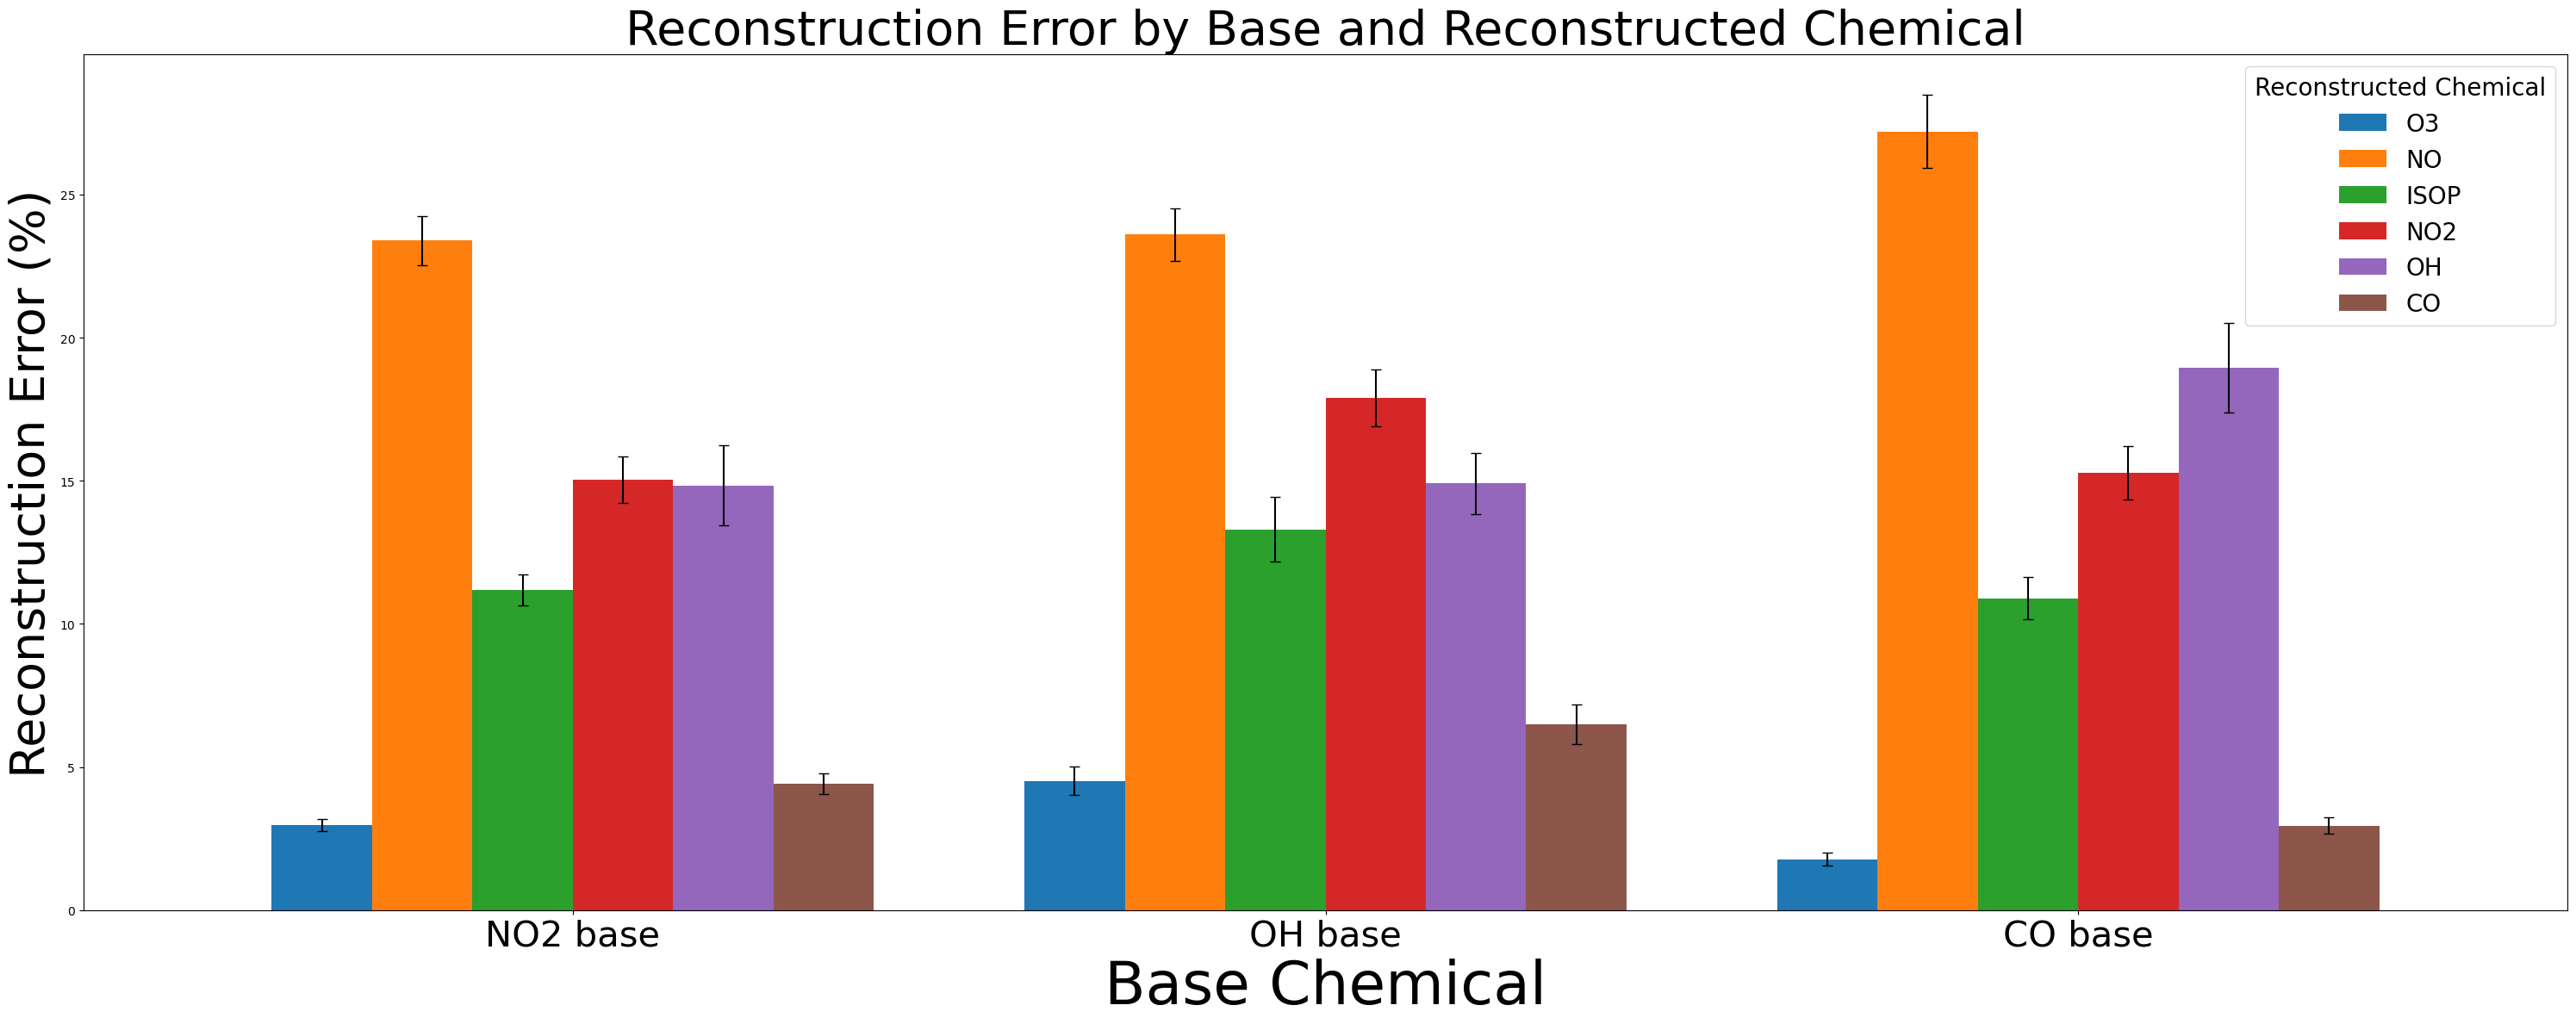

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

reconstructed = ['O3', 'NO', 'ISOP', 'NO2', 'OH', 'CO']
base = ['NO2 base', 'OH base', 'CO base']

means = np.array([
    [2.96, 4.52, 1.78],
    [23.39, 23.61, 27.21],
    [11.18, 13.3, 10.9],
    [15.05, 17.9, 15.28],
    [14.84, 14.91, 18.96],
    [4.42, 6.49, 2.95]
])

stds = np.array([
    [0.21, 0.49, 0.22],
    [0.87, 0.92, 1.27],
    [0.54, 1.13, 0.73],
    [0.81, 0.99, 0.93],
    [1.39, 1.07, 1.56],
    [0.36, 0.68, 0.29]
])

df_mean = pd.DataFrame(means, index=reconstructed, columns=base).T
df_std = pd.DataFrame(stds, index=reconstructed, columns=base).T
ax = df_mean.plot(kind='bar', yerr=df_std, capsize=4, figsize=(30, 12), width=0.8)
plt.title("Reconstruction Error by Base and Reconstructed Chemical", fontsize=40)
plt.xlabel("Base Chemical", fontsize=50)
plt.ylabel("Reconstruction Error (%)", fontsize=40)
plt.xticks(fontsize=30, rotation=0)
plt.legend(title="Reconstructed Chemical", title_fontsize=20,fontsize=20)
plt.tight_layout()

plt.show()


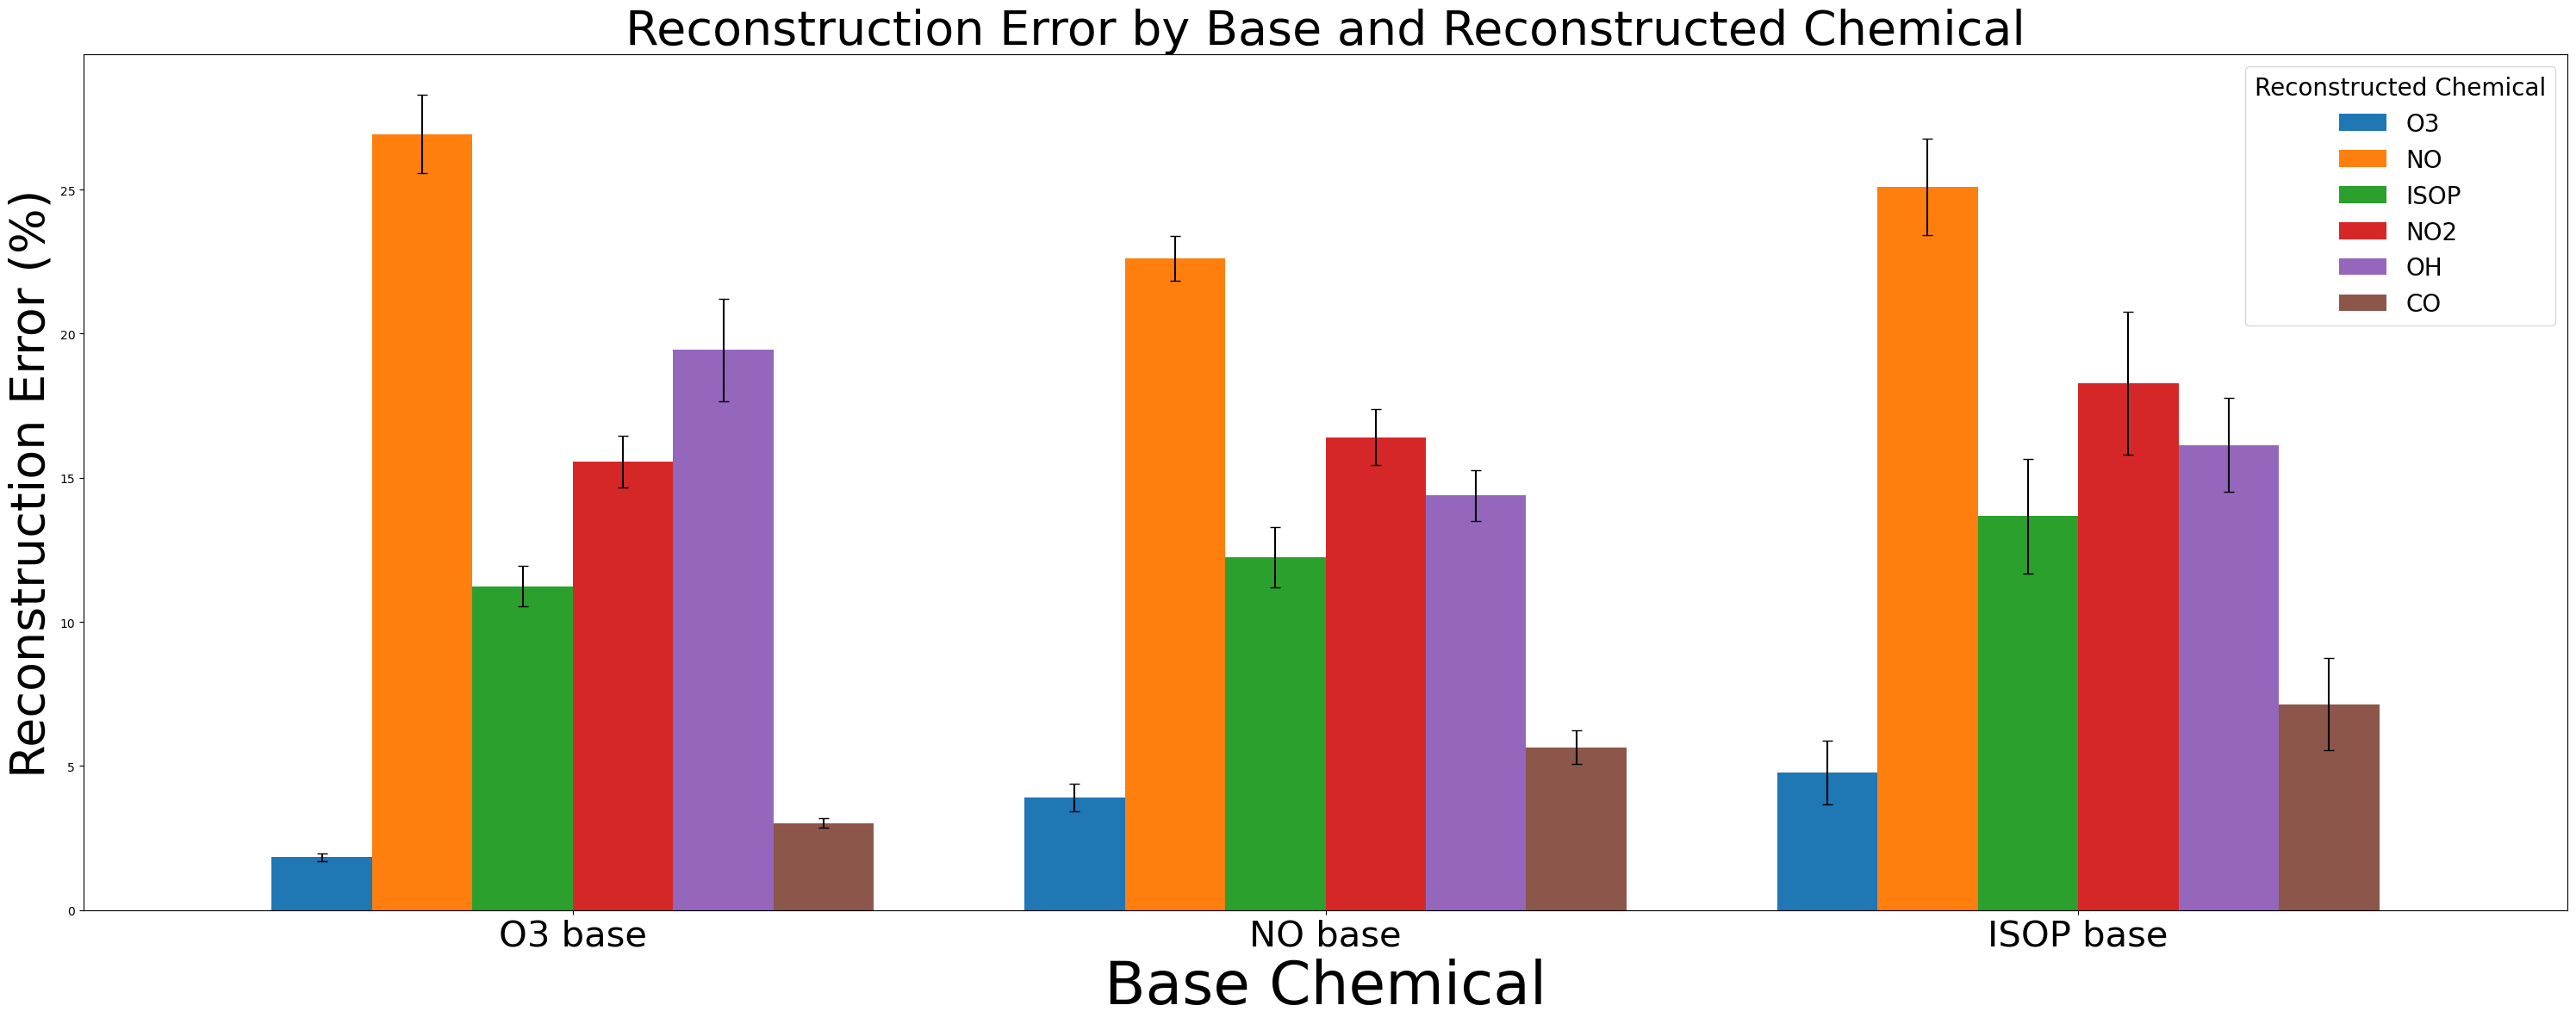

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

reconstructed = ['O3', 'NO', 'ISOP', 'NO2', 'OH', 'CO']
base = ['O3 base', 'NO base', 'ISOP base']

means = np.array([
    [1.83, 3.91, 4.78],
    [26.92, 22.62, 25.09],
    [11.23, 12.25, 13.67],
    [15.55, 16.41, 18.28],
    [19.43, 14.38, 16.14],
    [3.02, 5.65, 7.14]
])

stds = np.array([
    [0.14, 0.47, 1.1],
    [1.36, 0.77, 1.68],
    [0.7, 1.05, 1.98],
    [0.9, 0.96, 2.48],
    [1.79, 0.88, 1.63],
    [0.16, 0.59, 1.6]
])

df_mean = pd.DataFrame(means, index=reconstructed, columns=base).T
df_std = pd.DataFrame(stds, index=reconstructed, columns=base).T
ax = df_mean.plot(kind='bar', yerr=df_std, capsize=4, figsize=(30, 12), width=0.8)
plt.title("Reconstruction Error by Base and Reconstructed Chemical", fontsize=40)
plt.xlabel("Base Chemical", fontsize=50)
plt.ylabel("Reconstruction Error (%)", fontsize=40)
plt.xticks(fontsize=30, rotation=0)
plt.legend(title="Reconstructed Chemical", title_fontsize=20,fontsize=20)
plt.tight_layout()

plt.show()

In [14]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

base_dir = '/Users/nia/Desktop/items/visualizing/'
sensor_locations_ne = np.load(base_dir + 'sensor_locations_ne.npy')
test_recons = np.load(base_dir + 'test_recons.npy')
test_ground_truth = np.load(base_dir + 'test_ground_truth.npy')
u_total = np.load(base_dir + 'u_total.npy')
s_total = np.load(base_dir + 's_total.npy')

n1 = 87984
n2 = 2016
m2 = s_total.shape[1]
num_sensors = 20
nt = 100
nx=72
ny=26
nz=47
print(m2)

200


In [15]:
def find_error(jj, num_sensors, u_total, s_total, test_ground_truth, test_recons, m2):
    upca = u_total[:, jj*m2:(jj+1)*m2]
    spca = s_total[jj, :]
    vpca1 = test_ground_truth[:, jj*m2 + num_sensors:(jj+1)*m2 + num_sensors]
    vpca2 = test_recons[:, (jj*m2) + num_sensors:(jj+1)* m2 + num_sensors]
    u1svd = upca @ np.diag(spca) @ vpca1.T
    u2svd = upca @ np.diag(spca) @ vpca2.T
    u1svd = u1svd.reshape((47, 26, 72, 732), order='F')
    u2svd = u2svd.reshape((47, 26, 72, 732), order = 'F')
    return ((np.linalg.norm(u1svd - u2svd) / np.linalg.norm(u1svd)) * 100)

chemicals = ['O3', 'NO', 'ISOP', 'NO2', 'OH', 'CO']
for i in range(6):
    error=find_error(i, num_sensors, u_total, s_total, test_ground_truth, test_recons, m2)
    print(f"{chemicals[i]} error: {error:.2f}%")

O3 error: 1.94%
NO error: 27.37%
ISOP error: 11.44%
NO2 error: 15.83%
OH error: 18.73%
CO error: 3.11%


In [45]:
print(sensor_locations_ne.shape) 
print(test_recons.shape) 
print(test_ground_truth.shape)
print(u_total.shape) 
print(s_total.shape)

(20,)
(732, 1220)
(732, 1220)
(87984, 1200)
(6, 200)


In [46]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


output_dir = 'movie_all'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def create_gif(c, jj, e, num_sensors, u_total, s_total, test_ground_truth, test_recons, m2, nt):
    frames = []
    upca = u_total[:, jj*m2:(jj+1)*m2]
    spca = s_total[jj, :]
    vpca1 = test_ground_truth[:, jj*m2 + num_sensors:(jj+1)*m2 + num_sensors]
    vpca2 = test_recons[:, (jj*m2) + num_sensors:(jj+1)* m2 + num_sensors]

    u1svd = upca @ np.diag(spca) @ vpca1.T
    u2svd = upca @ np.diag(spca) @ vpca2.T
    u1svd = u1svd.reshape((47, 26, 72, 732), order='F')
    u2svd = u2svd.reshape((47, 26, 72, 732), order = 'F')
    u1svd = u1svd[e, :, :, :]
    u2svd = u2svd[e, :, :, :]

    
    for j in range(nt):
        fig = plt.figure(figsize=(15, 10))
        axes = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        shot1 = u1svd[:, :, j]
        shot1 = np.flip(shot1, axis=(0))
        axes.coastlines()
        extent = [-180, 180, -70, 70]
        img = axes.imshow(shot1, extent=extent, transform=ccrs.PlateCarree(), origin='upper', cmap='viridis')
        axes.set_title(f'{c} true')
        plt.savefig(f'{output_dir}/frame_{c}_true_{j}.png', dpi=80)
        plt.close()
        frame = Image.open(f'{output_dir}/frame_{c}_true_{j}.png')
        frames.append(frame.convert('RGB'))

    frames[0].save(f'{c}_true.gif', save_all=True, append_images=frames[1:], loop=0, duration=100)

    frames = []
    for j in range(nt):
        fig = plt.figure(figsize=(15, 10))
        axes = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        shot2 = u2svd[:, :, j]
        shot2 = np.flip(shot2, axis=(0))
        axes.coastlines()
        extent = [-180, 180, -70, 70]
        img = axes.imshow(shot2, extent=extent, transform=ccrs.PlateCarree(), origin='upper', cmap='viridis')
        axes.set_title(f'{c} reconstructed')
        plt.savefig(f'{output_dir}/frame_{c}_reconstructed_{j}.png', dpi=80)
        plt.close()
        frame = Image.open(f'{output_dir}/frame_{c}_reconstructed_{j}.png')
        frames.append(frame.convert('RGB'))

    frames[0].save(f'{c}_reconstructed.gif', save_all=True, append_images=frames[1:], loop=0, duration=100)

chemicals = ['O3', 'NO', 'ISOP', 'NO2', 'OH', 'CO']
for i, chem in enumerate(chemicals):
    create_gif(chem, i, i, num_sensors, u_total, s_total, test_ground_truth, test_recons, m2, nt)

In [48]:
from PIL import Image, ImageDraw, ImageFont

true_paths = ['O3_true.gif', 'NO_true.gif', 'ISOP_true.gif', 
              'NO2_true.gif', 'OH_true.gif', 'CO_true.gif']
recon_paths = ['O3_reconstructed.gif', 'NO_reconstructed.gif', 'ISOP_reconstructed.gif', 
               'NO2_reconstructed.gif', 'OH_reconstructed.gif', 'CO_reconstructed.gif']
chemical_names = ['O3', 'NO', 'ISOP', 'NO2', 'OH', 'CO']
def load_gifs(paths):
    return [Image.open(p) for p in paths]

def get_min_frames(gifs):
    return min(g.n_frames for g in gifs)

def add_label(img, text, font=None, padding=5):
    img_editable = img.copy()
    draw = ImageDraw.Draw(img_editable)
    if font is None:
        font = ImageFont.load_default()
    text_w, text_h = draw.textsize(text, font=font)
    rect_pos = [padding-2, padding-2, padding + text_w + 2, padding + text_h + 2]
    draw.rectangle(rect_pos, fill='white') 
    draw.text((padding, padding), text, fill='black', font=font)
    return img_editable

def add_title_bar(img, text, font=None, height=30):
    w, h = img.size
    title_bar = Image.new('RGB', (w, height), color='white')
    draw = ImageDraw.Draw(title_bar)
    if font is None:
        font = ImageFont.load_default()
    text_w, text_h = draw.textsize(text, font=font)
    draw.text(((w - text_w)//2, (height - text_h)//2), text, fill='black', font=font)
    combined = Image.new('RGB', (w, h + height), 'white')
    combined.paste(title_bar, (0, 0))
    combined.paste(img, (0, height))
    return combined

def combine_gifs_grid(gifs, chemical_names, grid_cols=3, title_text=''):
    n_frames = get_min_frames(gifs)
    w, h = gifs[0].size
    grid_rows = (len(gifs) + grid_cols - 1) // grid_cols
    combined_w = grid_cols * w
    combined_h = grid_rows * h
    
    combined_frames = []
    for frame_idx in range(n_frames):
        frames = []
        for idx, gif in enumerate(gifs):
            gif.seek(frame_idx)
            frame = gif.convert('RGB')
            frame = add_label(frame, chemical_names[idx])
            frames.append(frame)
        
        combined_img = Image.new('RGB', (combined_w, combined_h), 'white')
        for idx, frame in enumerate(frames):
            row = idx // grid_cols
            col = idx % grid_cols
            combined_img.paste(frame, (col * w, row * h))
        
        if title_text:
            combined_img = add_title_bar(combined_img, title_text)
        
        combined_frames.append(combined_img)
    
    return combined_frames

def save_gif(frames, filename, duration=100):
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        loop=0,
        duration=duration
    )

# Load gifs
true_gifs = load_gifs(true_paths)
recon_gifs = load_gifs(recon_paths)

# Combine gifs with labels and titles
combined_true_frames = combine_gifs_grid(true_gifs, chemical_names, grid_cols=3, title_text='True')
combined_recon_frames = combine_gifs_grid(recon_gifs, chemical_names, grid_cols=3, title_text='Reconstructed')

# Save combined gifs
save_gif(combined_true_frames, 'combined_true.gif')
save_gif(combined_recon_frames, 'combined_reconstructed.gif')

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text_h = draw.textsize(text, font=font)
/var/folders/b9/lhhdkk4n2jv5c7hbkg_l89pr0000gn/T/ipykernel_50336/3403731462.py:19: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_w, text

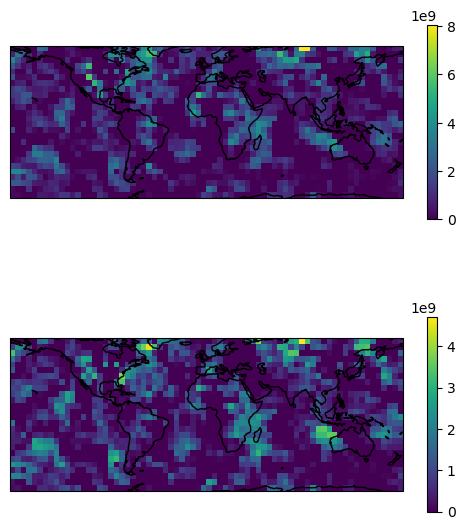

In [16]:
jj = 3
j=100
e=26

upca = u_total[:,jj:jj+m2]
spca = s_total[jj,:]
vpca1 = test_ground_truth[:,jj+num_sensors:jj+m2+num_sensors]
vpca2 = test_recons[:,jj+num_sensors:jj+m2+num_sensors]

u1svd = upca @ np.diag(spca) @ vpca1.T
u2svd = upca @ np.diag(spca) @ vpca2.T

u1svd = u1svd.reshape((47, 26, 72, 732), order='F')
u2svd = u2svd.reshape((47, 26, 72, 732), order = 'F')
u1svd = u1svd[e, :, :, j]
u2svd = u2svd[e, :, :, j]
u1svd = np.flip(u1svd, axis=(0))
u2svd = np.flip(u2svd, axis=(0))


fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
extent = [-180, 180, -70, 70]
img1 = ax1.imshow(u1svd, extent=extent, transform=ccrs.PlateCarree(), origin='upper', cmap='viridis', vmin=0)
cbar = plt.colorbar(img1, ax=ax1, orientation='vertical', shrink=0.7)

ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax2.coastlines()
extent = [-180, 180, -70, 70]
img2 = ax2.imshow(u2svd, extent=extent, transform=ccrs.PlateCarree(), origin='upper', cmap='viridis', vmin=0)
cbar = plt.colorbar(img2, ax=ax2, orientation='vertical', shrink=0.7)

plt.tight_layout()
plt.show()

(87984, 200)


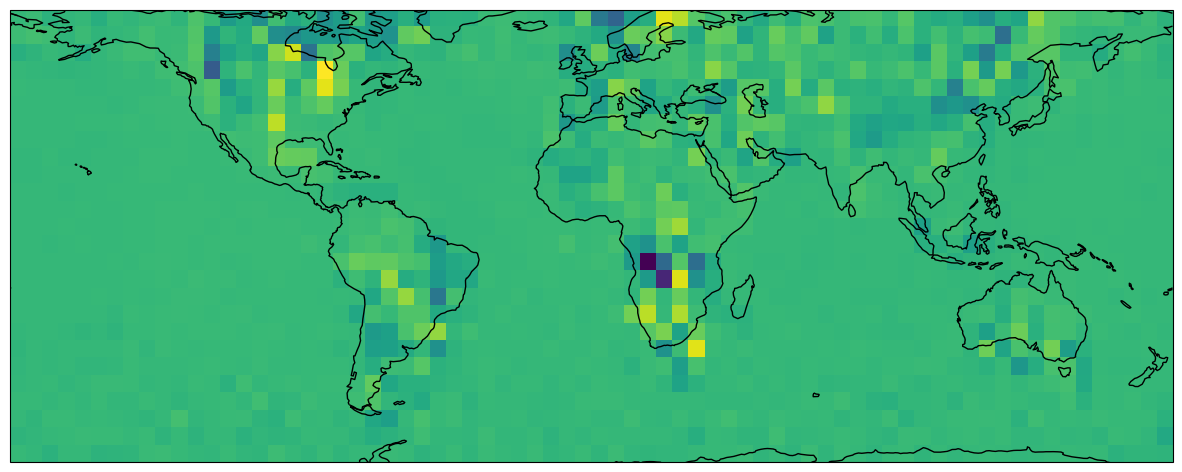

In [6]:
U = np.load('/Users/nia/Desktop/svd/O3_U.npy')
print(U.shape)

fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
U=U.reshape((47,26,72,200),order='F')
image = U[1, :, :, 1]
image = np.flip(image, axis=(0))
axes.coastlines()
extent = [-180, 180, -70, 70]
img = axes.imshow(image, extent=extent, transform=ccrs.PlateCarree(), origin='upper', cmap='viridis')
plt.show()

In [ ]:
nx=72
ny=26
nz=47
mask = np.zeros(n1)
for i in range(len(sensor_locations_ne)):
    mask[sensor_locations_ne[i]] = 1
mask2 = mask.reshape((nx, ny, nz))
x, y, z = np.indices((nx, ny, nz))
x = x.flatten()
y = y.flatten()
z = z.flatten()
mask = mask.flatten()

sensor_x = x[mask == 1]
sensor_y = y[mask == 1]
sensor_z = z[mask == 1]
def extract_coastline_data():
    """Extract latitude and longitude from Cartopy features"""
    lons = []
    lats = []
    for feature in cfeature.COASTLINE.geometries():
        if feature:
            lon, lat = feature.xy
            lons.extend(lon)
            lats.extend(lat)
    return np.array(lons), np.array(lats)

lons_coast, lats_coast = extract_coastline_data()
def lonlat_to_grid(lons, lats, lon_min=-180, lon_max=180, lat_min=-70, lat_max=70, nx=nx, ny=ny):
    x = np.linspace(lon_min, lon_max, nx)
    y = np.linspace(lat_min, lat_max, ny)
    lon_to_x = np.interp(lons, x, np.arange(nx))
    lat_to_y = np.interp(lats, y, np.arange(ny))
    return lon_to_x, lat_to_y

x_coast, y_coast = lonlat_to_grid(lons_coast, lats_coast)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_coast, y_coast, np.zeros_like(x_coast), color='blue', label='Coastlines')
scatter = ax.scatter(sensor_x, sensor_y, sensor_z, c=sensor_z, cmap='viridis', marker='o', label='Sensors')

cbar = plt.colorbar(scatter)
cbar.set_label('Elevation')
ax.set_xlabel('X axis (Longitude)')
ax.set_ylabel('Y axis (Latitude)')
ax.set_zlabel('Z axis (Elevation)')
ax.set_title('3D Plot of Sensor Locations with Coastlines')
ax.legend()
plt.savefig('sensor_locations_plot.png', dpi=300, bbox_inches='tight')